#### Leetcode 10. Regular Expression Matching
* Overview
  + Given an input string s and a pattern p, implement regular expression matching with support for '.' and '*' where:

    + '.' Matches any single character.​​​​
    + '*' Matches zero or more of the preceding element.
  + The matching should cover the entire input string (not partial).

* Algorithm
  + the basic concept is the following:
    + we match the first chars of text and pattern. If p(0) is in {text(0), '.'}, then the first chars of text and pattern are matched
    + if the second char of the pattern is not star, then we just continue to match the second chars of text and pattern without checking if their first chars are matched
    + Otherwise, there are two possibilities:
      a. the star represents zero preceeding letter, the we need to match text with p(2:) so just skip the first 2 letters of pattern (for example, a* means "")
      b.the star represents at least on preceeding letter, then if the first chars are matched, we then compare text(1:) with pattern. for example, if text = "aa" and pattern ="a*", since the first chars of text and pattern matched, we compare text = "a" and pattern ="a*", which first changes to text = "" and pattern ="a*", and this goes to item a (we don't need to match the first chars, we just match text = "" with pattern(2:), which is "", and are matched
  + dp
    + state variables are i, j corresponding to the starting indexes of text and pattern, respectively. The value of dp(i, j) is boolean of whether or not the text and pattern at these starting indices are matched or not 
    + recurrence relationship
      + for dp(i, j), if p(i) == "." or p(i) == s(j), first\_match = True
      + if j < len(p) -1 and p(j+1) == "*", return (first\_match and dp(i+1, j)) or dp(i, j+2)
      + otherwise, return first\_match and dp(i+1, j+1)
    + base cases
      + if i == len(s) and j == len(p), return True (s and p traversed to empty strings)
      + if i == len(s) and j < len(p) return False
* time complexity
  + O(mn) for 2d array
* space complexity
  + O(mn)   

In [ ]:
# Time limit exceeded
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        # if p is empty string, then only when s is empty string, return True
        # otherwise, return False. Note that the opposite is not true, that is
        # if s is empty, then p must be empty. P can be a*, for example, and 
        # still matches empty text
        if not p:
            return not s

        first_match = s and p[0] in {".", s[0]}   

        if len(p) > 1 and p[1] == "*":
                   # * means zero preceeding element or if * means > 0 cut text and match it to pattern
            return self.isMatch(s, p[2:]) or (first_match and self.isMatch(s[1:], p))

        return first_match and self.isMatch(s[1:], p[1:])    
    
 # top down
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        # if p is empty string, then only when s is empty string, return True
        # otherwise, return False. Note that the opposite is not true, that is
        # if s is empty, then p must be empty. P can be a*, for example, and 
        # still matches empty text
        if not p:
            return not s

        m, n = len(s), len(p)

        @lru_cache(None)
        def dp(i: int, j: int) -> bool:
            # both s and t are empty string or traverse to the end of the string
            # return True
            if i == m and j == n:
                return True

            # if pattern is consumed but text is not, return False
            if j == n:
                return False

            # check if the current index of pattern and text are matched
            first_match = i< m and p[j] in {s[i], "."}    

            # if the second char is *, then when * means 0, skip both preceeding letter and * of pattern
            # to match to text, or skip the current char of text to match to the entire pattern if * means > 1
            if j < n -1 and p[j+1] == "*":
                return (first_match and dp(i+1, j)) or dp(i, j+2)

            # if * is not the next char of pattern, do 1:1 match
            return first_match and dp(i+1, j+1)   

        return dp(0, 0)     
    
 # bottom up
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        # if p is empty string, then only when s is empty string, return True
        # otherwise, return False. Note that the opposite is not true, that is
        # if s is empty, then p must be empty. P can be a*, for example, and 
        # still matches empty text
        if not p:
            return not s

        m, n = len(s), len(p)

        # define dp array to represent the index of text (m) and pattern(n)
        dp = [[False] * (n+1) for _ in range(m+1)]

        # since the recurrence equation will depend on j+1, j+2 and i+1, we 
        # will define dp[-1][-1] = True meaning if both are empty strings,
        # we got a match
        dp[-1][-1] = True

        # we traverse from m to 0 for text since empty text may still match to a non-empty pattern such as a*
        # however, if the pattern is empty, the answer is False unless text is also empty dp[-1][-1].
        # so we only traverse from n-1 to 0 for pattern
        for i in range(m, -1, -1):
            for j in range(n-1, -1, -1):
                first_match = i < m and p[j] in {s[i], "."}
                # if the next j element is *, consider * represents 0 or > 0 
                # preceeding letter
                if j < n-1 and p[j+1] == "*":
                    dp[i][j] = (first_match and dp[i+1][j]) or dp[i][j+2]
                else:
                    dp[i][j] = first_match and dp[i+1][j+1]

        return dp[0][0]                


#### Leetcode 23. Merge k Sorted Lists
* Overview
  + You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.
  + Merge all the linked-lists into one sorted linked-list and return it.
* Algorithm
  + we use the merge template for sorted linked list to merge two linked lists using dummy node
  + after merge, return the new head
  + in the main function set up the iteration loop 
  + n = len(lists), interval = 1
  + while interval < n
    + for i in range(0, n-interval, 2 times interval)
      + lists(i) = merge\_lists(lists(i), lists(i+interval))
    + interval *= 2
    + return lists(0)
  + note that
    + if we have even number of lists, we merge every two of them and finally get one list
    + if we have odd number of lists, we merge the n-1 even number of the lists to list(0), and in the last iteration, we merge list(0) with list(n-1) when interval increased to n-1, which is an even number 
* time complexity
  + O(Nlogk) where N and k are length of each list and number of liniked list, respectively
* space complexity
  + O(1)

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        if not lists:
            return None

        # merge sorted linked list template using dummy node
        def merge_lists(l1 : Optional[ListNode], l2: Optional[ListNode])-> Optional[ListNode]:
            if l1 is None and l2 is None:
                return None
            if l1 is None:
                return l2
            if l2 is None:
                return l1

            head = ListNode(-1)
            curr = head

            while l1 and l2:
                if l1.val <= l2.val:
                    curr.next = l1
                    l1 = l1.next
                else:
                    curr.next = l2
                    l2 = l2.next
                curr = curr.next
                curr.next = None

            if l1:
                curr.next = l1
            if l2:
                curr.next = l2

            return head.next

        # get the length of the lists and initialize interval == 1
        n = len(lists)
        interval = 1

        
        # iterate until interval >= n
        # note that the last list has an index of n-1, so if you have odd
        # number of lists, its index == n-1, which is an even number and 
        # the last iteration will have inteval == n-1 to merge the index 0
        # list with the index n-1 list
        while interval < n:
            for i in range(0, n-interval, 2 * interval):
                lists[i] = merge_lists(lists[i], lists[i+interval])
            interval *= 2
        return lists[0]                                            

#### Leetcode 25. Reverse Nodes in k-Group
* Overview
  + Given the head of a linked list, reverse the nodes of the list k at a time, and return the modified list.
  + k is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of k then left-out nodes, in the end, should remain as it is.
  + You may not alter the values in the list's nodes, only nodes themselves may be changed.
* Algorithm
  + the idea is to apply the linked list reverse template to each k node sublist and connect them together
  + define ther reverse(node, k) function to reverse each k nodes and return the new head, tail and the next node for the next k-node reverse operation
    + first make sure there are k nodes available from the input node, if not, return the input node, None and None as the new head, tail and next node, respectively
    + otherwise, apply the reverse operation routine to reverse the k nodes in the linked list, and return the new head, tail and next node (pre, input node, and curr), respectively
  + define new\_head, pre\_tail as None
  + while head
    + get head, tail, and next_node from reverse(head, k)
    + if new\_head is None, set new\_head = head
    + if pre\_tail is not None, set its next to head to connect the sublist of the last iteration to the current reversed sublist
    + set pre\_tail = tail
    + set head = next\_node for the next iteration
  + return new\_head
* time complexity
  + O(N). we traverse the list twice in each function call. First to check if there are k nodes available and the second traversal to reverse the sublist
* space complexity
  + O(1)
  + we use iteration and set vaiables to store head, tail, next node and connect them


In [2]:
from typing import List, Optional
# Definition for singly-linked list.

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:

        if head is None:
            return None

        def reverse(node: Optional[ListNode], k:int) -> Tuple[ ListNode, Optional[ListNode]]:
            # if the current node is None, return new head, tail and next node as None
            if node is None:
                return node, None, None

            # check if we have k nodes to reverse, if not, return
            # the current head as new head, and None for tail and next node
            # since this will be the last k node reverse operation, we don't
            # need to consider the tail and next node for next iteration
            count = 0  # we set count == 0. If count < k out of the loop, there are no k nodes
            curr = node
            while count < k and curr:
                curr = curr.next
                count += 1
            
            # if count < k, we know there are not k nodes remaining in the list
            # this will be the last call to the reverse operation, so we don't
            # need to consider the tail and next node for next iteration, and just
            # return None for both of them
            if count < k:
                # return new head, new tail and next node
                return node, None, None    

            # apply the linked list reverse template to operate k times
            # return the new head, tail and the next node for the next
            # iteration
            count = 0
            pre = None
            curr = node
            while count < k and curr:   
                next_node = curr.next
                curr.next = pre
                pre = curr
                curr = next_node
                count += 1

            # reutn new head, new tail, and next node
            return pre, node, curr 

        # intialize new_head and pre_tail to define the head for the new list
        # and link the sublists across mutliple iterations
        new_head, pre_tail = None, None
        
        while head:
            # return new head, tail and next node for
            # next iteration after reversing k nodes
            head, tail, next_node = reverse(head, k)

            # if this is the first reversion, set 
            # the head as new_head
            if new_head is None:
                new_head = head 

            # if this is not the first reverse operation,
            # connect the last iteration's tail to the 
            # current iteration's head. set the current
            # tail as pre_tail for the next iteration
            if pre_tail:
                pre_tail.next = head
            pre_tail = tail
            
            # set head to the next_node for the next 
            # iteration
            head = next_node    

        # return the new_head
        return new_head    

#### Leetcode 30. Substring with Concatenation of All Words
* Overview
  + You are given a string s and an array of strings words. All the strings of words are of the same length.
  + A concatenated substring in s is a substring that contains all the strings of any permutation of words concatenated.
    + For example, if words = \["ab","cd","ef"\], then "abcdef", "abefcd", "cdabef", "cdefab", "efabcd", and "efcdab" are all concatenated strings. "acdbef" is not a concatenated substring because it is not the concatenation of any permutation of words.
  + Return the starting indices of all the concatenated substrings in s. You can return the answer in any order.
* Algorithm
  + use sliding window
  + define the length of each word as the step to slide the window
  + define the total length of the words in words to get the length of the substring we need to check
  + use a Counter to record the frequency of each word in words
  + the sliding window function is a pretty standard template
    + define start = end from input left index
    + check the right most word. If it is not in the words, then reset the window
    + otherwise, update the words\_found dictionary to increment the right most word count
    + check if the count > the count in the Counter. If so, we include an excess word in the windown. Increment excess\_words
    + while start <= end and excess\_words > 0, shrink the left side of window
      + get startWord
      + start += step
      + decrement the words\_count(startWord)
      + if the updated count == Counter(startWord), we removed an excess word, decrement the excess words
        + keep shrinking until we remove all excess words
      + check if we have the right substring length and excess words == 0, if so, add the sart index t rs
      + expand the right side of the widnow by a step
      
  * traverse i in range 0 to step -1. we only consider the start index of these patterns. Each pattern will continue to explore all the possbile combinations until the end to the string   
  
* Time complexity
  + O(a + bn) where a, b  and n are the length of length of words list, the length of each word, and the length of input string s, respectively
    + O(a) steps used on builing counter dictionary
    + O(n) for each sliding window operation, and we have b iterations in the for loop, so O(nb)
* Space complexity
  + O(a+b)
    + O(a) to store Counter
    + O(b) to store substring for each step in sliding window (start and end words)

In [ ]:
class Solution:
    def findSubstring(self, s: str, words: List[str]) -> List[int]:
        if not words or len(words[0]) == 0 or not s:
            return []

        # define the length of each word in words as the step
        # to traverse in sliding window
        step = len(words[0])
        
        # from the number of words in words list
        # define the substring_length we need to check
        # for each potential substring
        k = len(words)
        substring_size = step * k

        rs = []

        # define the word counter to check the matches
        # between the words list and the substrings in
        # a given sliding window
        word_counts = collections.Counter(words)

        # define the length of s to define the window end index
        n = len(s)

        # define the sliding_window function
        def sliding_window(left: int) -> None:
            # keep track of the count of words found in the window
            words_found = defaultdict(int)
            
            # initialize words_matched and excess_words as 0
            words_matched = 0
            excess_words = 0

            # apply sliding windown template to define the 
            # start and end index of the window. Note that
            # start and end refers to the indexes of the start
            # and end word searched in the substring
            start, end = left, left

            # define the right most index of the window 
            # note here we use n-step+1
            while end < n - step + 1:
                sub = s[end: end+step]
                
                # if the sub is not a word in the words list
                # we define a new window by initializing all
                # config parameters, and words_found dictionary
                # and skip the remaining operations directly to
                # the next iteration
                if sub not in word_counts:
                    end = end + step 
                    start = end
                    words_found = defaultdict(int)
                    words_matched = 0
                    excess_words = 0
                    continue

                # increment the counts of the word of end index
                # and if the count is <= count in word_counts,
                # increment the words_matched since we find a matched word
                words_found[sub] += 1
                if words_found[sub] <= word_counts[sub]:
                    words_matched += 1
                # otherwise, mark the excess_words
                else:
                    excess_words += 1

                # shrink the left side of window if there 
                # are excess_words in the window
                while start <= end and excess_words > 0:
                    # obtain the left most word in the window
                    start_sub = s[start:start+step]
                    
                    # shrink the left side of the window
                    # and remove the leftmost word from words_fount
                    start += step
                    words_found[start_sub] -= 1
                    
                    # if the updated words_found[start_sub] == word_counts[start_sub]
                    # we just removed an excess word, so we decrement the excess_words
                    if words_found[start_sub] == word_counts[start_sub]:
                        excess_words -= 1
                
                # check if we have found the substring with the right size
                # and dosen't contain any excess words. If so, add it to rs
                if end + step - start == substring_size and excess_words == 0:
                    rs.append(start) 

                # expand the right side of the window
                end += step

        # note that we only need to iterate the first step indexes of the 
        # string. Since all the patterns with the same starting index will
        # automatically continue to the end of the string
        for i in range(step):
            sliding_window(i)   

        return rs                             



#### Leetcode 32. Longest Valid Parentheses
* Overview
  + Given a string containing just the characters '(' and ')', return the length of the longest valid (well-formed) parentheses substring
* Algorithm
  + linear scan
    + initialize left = right = 0
    + first scan from left to right
      + if curr is left, left += 1, else right += 1
      + if left == right, rs = max(rs, 2 times left) since each left is matched to a right, the total length of valid parathesis is 2 times left
      + if right > left, there is no way we can get correct parathesis by adding more left parathesis, since left parathesis is always at the left side, so reset left = right = 0
      + else, continue to parse the string
    + then scan from right to left
      + if left = right, rs = max(rs, 2 times right)
      + if left > right, we can not compensate the extra left by adding more right to the left of the left parathesis, reset left = right = 0
      + else, continue
    + return rs
    + time complexity: O(N). scan the string twice
    + space complexity: O(1)
    
  + DP 
    + initialize a dp array of n and intialize the elements as 0s
    + traverse the dp element. If the curr char is left parathesis, the value is zero, so we just continue
    + if the curr is right parathesis, if i > 0 and s(i-1) == "(", dp(i) = dp(i-2) + 2. This is obvious. If the curr is ")", and its previous char is "(", they form a two element valid combination, plus dp(i-2), if dp(i-2) also corresponding to a valid parathesis combination. If s(i-2) is a left parathesis, we know its value is zero
    + if the curr is right paratheis, and s(i-1) == ")", there is only one way the curren ")" can be a part of the a valid parathesis: the ")" at s(i-1) position is a valid parathesis combination, and the position before its parathesis combination is a "(" that can combine with the ")" at position i. If so, we check if i > dp(i-1) since we must have at least one position doesn't belong to dp(i-1) structure for the left parethesis to match the ) at position i. There are altogether i positions from 0 to i-1, so dp(i-1) must be < i. Then we check if s(i-dp(i-1)-1) == "(". if so, we add dp(i-1) + 2 to dp(i) (including the entire strcuture of dp(i-1)'s combination, and the ( and ) at position of i-dp(i-1) -1 and i, respectively, and also add dp(i-dp(i-1)-2) if the char at that position is a ), and it also form a valid parathesis structure, so that we can link it to the current structure
    + return max(dp)    
    + time and space complexity: O(n)    
  + stack
    + initialize stack with -1
    + if the current char is (, push it to stack
    + otherwise, 
      + pop the stack, and if stack is not empty, rs = max(rs, i-stack(-1))
      + if stack is empty after the pop, the current ) can not form valid parathesis structure, since no ( can match it, so we push the current index to the stack to restart counting process
    + return rs
    + time complexity: O(N) since we scan the string
    + space complexity: O(N) depending on the length of the max valid structure

In [1]:
# linear scanning from both sides
class Solution:
    def longestValidParentheses(self, s: str) -> int:
        if not s:
            return 0

        left = right = 0
        rs = 0
        for ch in s:
            if ch =="(":
                left += 1
            else:
                right += 1
            # if left == right, each left is matched by a right
            # the total length of the valid parathesis is 2*left
            if left == right:
                rs = max(rs, 2 * left)
            
            # if right > left, there is no way we can match
            # those right parathesis by adding more left parathesis
            # so we reset left and right to 0
            elif right > left:
                left, right = 0, 0

        left = right = 0
        for ch in s[::-1]:
            if ch == "(":
                left += 1
            else:
                right += 1
            if left == right:
                rs = max(rs, 2 * left)
            # if left > right, there is no way to compensate the extra left parathesis 
            # by adding more right parathesis to their left side, so reset left and right    
            elif left > right:  
                left = right = 0

        return rs  
    
# dp
class Solution:
    def longestValidParentheses(self, s: str) -> int:
        if not s:
            return 0

        n = len(s)

        dp = [0] * n

        for i, c in enumerate(s):
            # if c == "(", skip. the dp[i] = 0
            if c == ")":
                # if s[i-1] == "(", it can match with s[i]
                # and combine with dp[i-2]
                if i > 0 and s[i-1] == "(":
                    dp[i] = dp[i-2] + 2
                # else, if there is another ) before the current )
                elif i > 0 and s[i-1] == ")":
                    # make sure i > dp[i-1] since we need at least on position before the s[i-1]
                    # parathesis structure to be a ( to match the current ) at position i
                    # we then trace back to the position before the s[i-1] structure and 
                    # ensure it is a ( to match ) at position i
                    if i> dp[i-1] and s[i-dp[i-1]-1] == "(":
                        # we then add the length of the s[i-1] valid parathesis structure by 2
                        # reprsenting the ( and ) at position before s[i-1] structure and i
                        # we then add the length of the possible valid struture ended at i-dp[i-1] -2
                        # which is the position before the ( that match the ) at position i
                        dp[i] = dp[i-1] + 2 + dp[i-dp[i-1]-2]
        
        return max(dp)

# stack
class Solution:
    def longestValidParentheses(self, s: str) -> int:
        if not s:
            return 0

        stack =[-1]  
        rs = 0  
        for i, c in enumerate(s):
            # push index of ( to the stack
            if c == "(":
                stack.append(i)
            else:
                # if current char is a )
                # pop the stack first, if the top index corresponding to (
                # there must be an element below it to cacluate the length
                # of a valid structure. the index after the pop can corresponds
                # to either left or right parathesis. (e.g. a disrupted structure)
                # otherwise, the stack is empty after the pop, meaning the start of
                # a new counting process.    
                stack.pop()
                if stack:
                    rs = max(rs, i-stack[-1]) 
                # if stack is empty, the current structure is not valid,
                # push the current ) to stack and restart the counting process
                else:
                    stack.append(i)

        return rs                   

#### 

#### Leetcode 41. First Missing Positive
* Overview
  + Given an unsorted integer array nums, return the smallest missing positive integer.
  + You must implement an algorithm that runs in O(n) time and uses constant extra space.
* Algorithm
  + this is a counting sort problem
  + first, considering the edge case where all positive integers from 1 are present, then the smallest missing number is n+1
  + second, any number in the range of 1 and n is missed, we will return the smallest of them
  + procedure
    + first if 1 is missed from the array, we know 1 is the smallest missing value, return 1
    + modify all the numbers <= 0 or > n to 1. Now all numbers are in the range 1 and n
    + apply the counting sort template
      + traverse the values of the numbers in num, get the corresponding index by abs(num) -1, which is guarantee to be in the range of 0 and n-1.
        + if nums(index) > 0, convert it to its opposite
      + traverse the index from 0 to n-1, if any number >0, then the number corresponds to its index is missed, so return i+1
      + if all numbers from 1 and n are not missed, then return n+1
    + note: n+1 may be in the array but we convert it to 1. It will not affect the results, since each number before it has the priority. If n+1 is present, it must replace one of numbers from 1 to n.  
* time complexity
  + O(N) linear scanning the array
* space complexity
  + O(1)

In [3]:
from typing import List
class Solution:
    def firstMissingPositive(self, nums: List[int]) -> int:
        if not nums:
            return 1

        n = len(nums)

        if 1 not in nums:
            return 1

        for i, num in enumerate(nums):
            if num <= 0 or num > n:
                nums[i] = 1    

        for num in nums:
            index = abs(num) - 1
            if nums[index] > 0:
                nums[index] = -nums[index]

        for i in range(n):
            if nums[i] > 0:
                return i + 1
        return n + 1                            

#### Leetcode 42. Trapping Rain Water
* Overview
  + Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.
* Algorithm
  + for any index position i, the water that can be stored at this position is decided by the short bar of of highest bar to its left and right.
  + at each index i, if we can find the min(higest\_left, highest\_right)-heights(i) is the amount of water it can store
  + note that the array of the highest bar scanned from the left and the array of the highest bar scanned from the right are both mono increasing series. Therefore, we only need to maintain two pointers, left and right to keep track of the highest bar from the both direction
  + note that if leftmax < rightmax, the water that can be store at pointer left has been determined by leftmax, which is the max value across all the bars to its left, including itself. If leftmax >= rightmax, water at poiter right is determined by rightmax, which is the max value across all bars to its right including itself. 
  + initialize left and right pointers as 0 and n-1, respectively
  + initialize leftmax and rightmax as heights(left) and heights(right)
  + scan two pointers, while left < right
    + if leftmax < rightmax
      + ans += leftmax - heights(left)
      + leftmax = max(leftmax, heights(left)
      + left += 1
    + else
      + ans += rightmax - heights(right)
      + rightmax = max(rightmax, heights(right))
      + right -= 1
  + return ans
* Time complexity
  + O(N)
* Space complexity
  + O(1)

In [4]:
from typing import List
class Solution:
    def trap(self, height: List[int]) -> int:
        if not height:
            return 0

        n = len(height)

        left, right = 0, n - 1
        left_max, right_max = height[left], height[right]
        rs = 0

        while left < right:
            if left_max < right_max:
                rs += left_max - height[left]
                left += 1
                left_max = max(left_max, height[left])
            else:
                rs += right_max - height[right]
                right -= 1
                right_max = max(right_max, height[right])

        return rs            
            

#### Leetcode 44. Wildcard Matching
* Overview
  + Given an input string (s) and a pattern (p), implement wildcard pattern matching with support for '?' and '*' where:
    + '?' Matches any single character.
    + '*' Matches any sequence of characters (including the empty sequence).
  + The matching should cover the entire input string (not partial).
* Algorithm
  + backtrack recursive
    + define state variables i, and j to represent the current index of text and pattern 
    + m, n are the length of text(s) and pattern(p), respectively
    + if j == n, return i == m (if the pattern is exhausted, then text must be exhuasted)
    + if s(i) == p(j) or p(j) == "?", return dp(i+1, j+1) since the current chars are matched, we go to the next indices for both s and p
    + if p(j) = "*", there are two possibilities
      + it represents empty char, so we check to match dp(i, j+1) by ignoring the star at j position
      + it represent any char, we check dp(i+1, j), so we consume the s(i) and check (i+1, j) when i < m-1
        + whether or not we needs to ignore start at j position depends on the next recursive call
    + return dp(0, 0)    
  + dp (2d)
    + initialize 2d array with (m+1, n+1) dimensions and each element is False
    + each row represents the index of chars in text s, and each column reprsent a letter index in p
    + dp(0, 0) = True (empty match empty strings)
    + for the first column, if current p char (p(j-1) == start), dp(0, j) = dp(0, j-1)
      + this handles p = "******************" and s =""
    + for the first row, except for dp(0, 0), empty string will not match an non-empty pattern, so all of them are False. We don't need to do anything
    + traverse the dp matrix from i = 1 and j=1
      + if p(j-1) in {s(i-1), "?"} dp(i, j) = dp(i-1, j-1). Note there is one offset between index i, j in matrix and in s and p strings
      + elif p(j-1) == star, 
        a. we can use the star as an empty string, this will goes to dp(i)(j-1). So if s(i) can match p(j-1) dp(i, j) is True and we just ignore the current star at j position. This is in horizonal direction from left to right
        b. we can use the star as a universal matcher, this will go from top to bottom in vertical direction. The logic is that if at the fixed position j, dp(i-1)(j) is True, then all the following i of dp(i)(j) will be True. as to what happens to the first i that dp(i, j) is True, it can be set from the horizontal direction as in item a
        
* Time complexity
  + for recursive algorithm, it is complicated. For DP algorithm, it is O(mn)
* Space complexity
  + O(mn) for both algorithms
    

In [7]:
from typing import List

# recursive implementation
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        if not p and not s:
            return True
        if p == "*":
            return True

        m, n = len(s), len(p)
        @lru_cache(None)
        def dp(i: int, j: int) -> bool:
            if j == n:
                return i == m

            if i < m and j < n and (s[i] == p[j] or p[j] == "?"):
                    return dp(i+1, j+1)

            if p[j] == "*":
                    # if j == n-1, and p[j] == *, return True
                    # if we ignore *, call dp(i, j+1), or if
                    # we consume star to match s[i], we call dp(i+1, j)
                    # if any of these three is true, return true
                    return j == n-1 or dp(i, j+1) or (i < m - 1 and dp(i+1, j)) 
            return False     

        return dp(0, 0)    
    
# dp implementation
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        if not p and not s:
            return True
        if p == "*":
            return True

        m, n = len(s), len(p)
        dp = [[False] * (n+1) for _ in range(m+1)]
        dp[0][0] = True

        # first define the first column where the text is empty string
        # and the current value of the pattern is *
        # if the current value is *, then to match the empty string of s,
        # the previous char in pattern should match the empty string
        # this actually says the all the previous chars are starts in pattern
        for i in range(1, n+1):
            if p[i-1] == "*":
                dp[0][i] = dp[0][i-1]

        # if pattern is empty string, then all the first row are False except dp[0][0]
        # since no text can match the empty string pattern except that the text itself
        # is an empty string. So we don't need to do anything to the first row

        # Now, we only need to traverse dp for i >= 1 and j >= 1. Note that indices i, j 
        # have a offset of 1 when retrieving the chars from p and s. There are three cases:
        # p[j-1] == s[i-1], or p[j-1]=="?", dp[i][j] = dp[i-1][j-1]
        # p[j-1] == *, if we ignore *, we check dp[i][j-1], meaning that we igonre the current 
        # j position, and dp[i][j] == dp[i][j-1]. We can also consume the current i by matching
        # if with the * at j position. The key point is that if dp[i-1][j] is True, we know this
        # j position start has been used as a universal char matcher, and all the following is in
        # text will be True. Therefore, dp[i][j] = dp[i-1][j]. To summarize, igoring * goes along the
        # horizontal direction from left to right. Consuming * as a universal matcher go along the
        # vertical direction from top to bottom

        for i in range(1, m+1):
            for j in range(1, n+1):
                if p[j-1] == s[i-1] or p[j-1] == "?":
                    dp[i][j] = dp[i-1][j-1]
                elif p[j-1] == "*":
                    dp[i][j] = dp[i-1][j] or dp[i][j-1]

       
        return dp[m][n] 

#### Leetcode 51. N-Queens
* Overview
  + The n-queens puzzle is the problem of placing n queens on an n x n chessboard such that no two queens attack each other.
  + Given an integer n, return all distinct solutions to the n-queens puzzle. You may return the answer in any order.
  + Each solution contains a distinct board configuration of the n-queens' placement, where 'Q' and '.' both indicate a queen and an empty space, respectively.
* Algorithm
  + initialize cols, diags, and antidiags as empty sets to store the restrictions
  + initialize rs as empty list to accepst all possible solutions
  + define backtrack(row, inter\_rs)
    + if row == n, that means we have successfully put n queens in row 1 to n-1, and get a solution.
      + rs.append(inter\_rs)
    + traverse all the possible column indices for j in range(n)
      + check if the current position has any conflice from cols, diagonal and anti-diagonal directions, if not, add the cols, antidiagonal and diagonal restrictions to the sets and recursively call backtrack(row +1, inter\_rs + \[(row, j)\]
      + after the backtrack call when recursive stack returns, remove j, diag and antidiag from the sets
  + extract solutions from rs
    + initialize n time n 2d list with each elemwnt initialized to be . Defined it as tmp
    + for each i, j pair in solution, tmp(i, j) = "Q"
    + for i in range(n), tmp(i) = "".join(tmp(i))
    + append tmp to rs
    + return rs
* time complexty
  + O(N!)
* space complexity
  + O(N^2)
 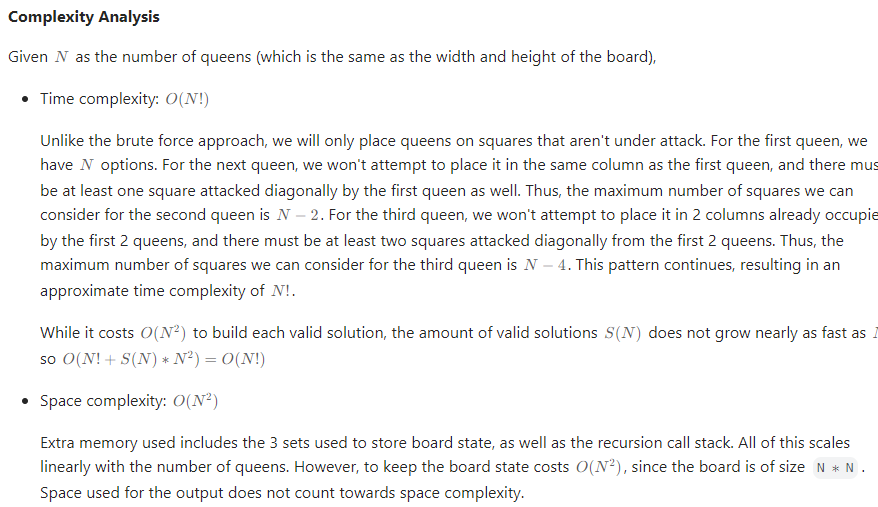 
  

In [9]:
from typing import List, Tuple
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        if n == 0:
            return []
        if n == 1:
            return [["Q"]]    

        cols, diags, antidiags = set(), set(), set()
        rs = [] 
        
        def backtrack(row: int, inter_rs: List[Tuple[int, int]]) -> None:
            if row == n:
                rs.append(inter_rs)
                return

            for j in range(n):
                diag = j - row
                antidiag = j + row
                if (j not in cols) and (diag not in diags) and (antidiag not in antidiags):
                    diags.add(diag)
                    antidiags.add(antidiag) 
                    cols.add(j)
                    backtrack(row+1, inter_rs + [(row, j)])
                    diags.remove(diag)
                    antidiags.remove(antidiag)
                    cols.remove(j)

        backtrack(0, [])

        if not rs:
            return []

        ret = []    

        for solution in rs:
            tmp = [["."] * n for _ in range(n)]
            for i, j in solution:
                tmp[i][j] = "Q"
            for row in range(n):
                tmp[row] = "".join(tmp[row])
            ret.append(tmp)

        return ret                               

#### Leetcode 123. Best Time to Buy and Sell Stock III
* Overview
  + You are given an array prices where prices[i] is the price of a given stock on the ith day.
  + Find the maximum profit you can achieve. You may complete at most two transactions.
  + Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).
* Algorithm
  + DP
    + we have two transactions. In transaction 1, you buy stock and then sell it with cost1, and profit1.
    + then at least one day after you sell the stock in transaction 1, you can buy and sell for the second transaction
    + we need to return the max profit, considering both the transaction
    + For transaction 1, the buying must happen to the min price before the selling of the first stock, lets say day i, so we can find the max profit for each index starting from 1 to n-1. If a tansaction before day i has bigger profit, we keep that max in left list. Therefore, left(i) is the max profit we can get by selling stock before and including day i
    + for transaction 2, the same thing applies, but we can focus on the selling day, and scan from n-2 to 0 to find the max profit due to the max selling price after day i, so right(i) is the max profit we can get if buy the stock from day i and after.
    + we then scan for each i, get max(rs, left(i)+right(i+1)) where left(i) and right(i+1) are the max profit we can get if we sell stock on day i and buy stock on day i+1 and sell it later.
    
  + Two pointers
    + an easy logic is that we optimize the two transactions in the same direction and follow the normal workflow
    + we scan from left to right, and find the min\_left, and the profit for transaction 1
    + we then link the first transaction 1 to transaction 2 by realizing that the cost of transaction 2 is the buying price at day i - profit 1, and we need to minize the cost2 and maximize profit 2. 
    + by connecting these transactions together, we use a single logic to scan from lef to right and obtain the max profit
    + one problem is that what if I sell the stock for transaction 1 and buy the stock on the same day?. This is the same as we only proceed one transaction, as we buy the first stock and sell it on the selling day of the second stock. This is also a valid answer since we don't have to do two transactions. If one transaction can get more profit, this is a valid answer.
    + profit2 considers the profits of both transactions

In [10]:
from typing import List

# DP implementation
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        if not prices:
            return 0

        n = len(prices)

        # define left and right arrays to store the max profit
        # from transactions before each index in [1, n-1]
        # we initialize right to have n + 1 element to enbale 
        # the easy traverse when traversing from 0 to n-1 and
        # calculate the combined cost of left and right arrays
        left = [0] * n
        right = [0] * (n + 1)

        
        left
        left_min, right_max = prices[0], prices[n-1]  

        for i in range(1, n):
            # traverse from left to right to store the max profit
            # in left array. Each element refers to the max profit
            # by transactions before and including day i as selling day
            
            # update the max profit can be obtained so far (selling day is i)
            left[i] = max(prices[i] - left_min, left[i-1])
            
            # update the min price so far
            left_min = min(left_min, prices[i])  

            # traverse from right to left to store the max profit
            # in right array. Each element refers to the max profit
            # by transactions after and including as buying day
            
            # starting from n-2 and update the max profit so far (buying day is i)
            r_index = n - 1 - i 
            right[r_index] = max(right[r_index+1], right_max - prices[r_index])
            right_max = max(right_max, prices[r_index])

        rs = 0
        for i in range(n):
            rs = max(rs, left[i] + right[i+1])

        return rs    

# two pointer implementation    
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        if not prices:
            return 0

        # initialize the costs and profits for 
        # transactions 1 and 2
        cost1 = cost2 = float("inf")
        profit1 = profit2 = 0
        
        for price in prices:  
            # traverse te stocks and calculate profit1
            # and cost1 as the max profit and min cost
            # so far          
            profit1 = max(profit1, price - cost1)
            cost1 = min(cost1, price)

            # traverse the stocks and calculate profit2
            # and cost2. Note that cost2 considers the
            # re-investing profit1 to link the two transactions
            cost2 = min(cost2, price-profit1)
            profit2 = max(profit2, price-cost2)
        
        return profit2    
